

# Identification


# 1. Analyse exploratoire

## Exploration des données



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score,accuracy_score


1. **Charger le jeu de données et fournir un résumé de sa structure** :

    - Décrivez les attributs (colonnes), leurs types de données et la variable cible.

In [3]:
# Charger les données à partir du fichier CSV et Afficher les premières lignes du dataset
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [28]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [29]:
# Afficher un résumé de la structure des données
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Description des attributs :

| **Attribut**        | **Type**     | **Description**                                                                                                                                          |
|---------------------|--------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|
| **HeartDisease**     | Catégoriel   | Indique si la personne souffre d'une maladie cardiaque (1 = Oui, 0 = Non). C'est la variable cible pour la prédiction.                                    |
| **BMI**              | Numérique    | Indice de masse corporelle (IMC) de la personne. Plus l'IMC est élevé, plus le risque de maladie cardiaque augmente.                                       |
| **Smoking**          | Catégoriel   | Indique si la personne fume (1 = Oui, 0 = Non). Le tabagisme est un facteur de risque important pour les maladies cardiaques.                             |
| **AlcoholDrinking**  | Catégoriel   | Indique si la personne consomme de l'alcool (1 = Oui, 0 = Non). Une consommation excessive d'alcool peut augmenter les risques cardiovasculaires.         |
| **Stroke**           | Catégoriel   | Indique si la personne a déjà eu un AVC (1 = Oui, 0 = Non). Un antécédent d'AVC est un facteur de risque majeur pour les maladies cardiaques.               |
| **PhysicalHealth**   | Numérique    | Nombre de jours où la personne a eu une mauvaise santé physique au cours du dernier mois. Peut refléter l'impact de la santé physique sur le cœur.       |
| **MentalHealth**     | Numérique    | Nombre de jours où la personne a eu une mauvaise santé mentale au cours du dernier mois. Le stress et la dépression affectent aussi la santé cardiaque.    |
| **DiffWalking**      | Catégoriel   | Indique si la personne a des difficultés à marcher (1 = Oui, 0 = Non). La difficulté à marcher peut être liée à des problèmes cardiaques.                 |
| **Sex**              | Catégoriel   | Sexe de la personne (Male/Female). Les maladies cardiaques peuvent affecter les sexes de manière différente.                                              |
| **AgeCategory**      | Catégoriel   | Catégorie d'âge de la personne (par exemple "20-29", "30-39", etc.). L'âge est un facteur de risque majeur pour les maladies cardiaques.                  |
| **Race**             | Catégoriel   | Race ou ethnie de la personne. Certaines populations sont plus sujettes aux maladies cardiaques.                                                          |
| **Diabetic**         | Catégoriel   | Indique si la personne est diabétique (1 = Oui, 0 = Non). Le diabète est un facteur de risque bien connu pour les maladies cardiaques.                    |
| **PhysicalActivity** | Catégoriel   | Indique si la personne pratique une activité physique régulière (1 = Oui, 0 = Non). L'exercice physique réduit le risque de maladies cardiaques.         |
| **GenHealth**        | Catégoriel   | Perception générale de la santé de la personne. Un bon état de santé général est souvent corrélé à une meilleure santé cardiaque.                        |
| **SleepTime**        | Numérique    | Nombre d'heures de sommeil par nuit. Un sommeil insuffisant peut augmenter les risques de maladies cardiovasculaires.                                       |
| **Asthma**           | Catégoriel   | Indique si la personne a de l'asthme (1 = Oui, 0 = Non). Bien que l'asthme n'ait pas de lien direct avec les maladies cardiaques, il peut affecter la santé générale. |
| **KidneyDisease**    | Catégoriel   | Indique si la personne a une maladie rénale (1 = Oui, 0 = Non). Les maladies rénales peuvent augmenter les risques de maladies cardiaques.                |
| **SkinCancer**       | Catégoriel   | Indique si la personne a un antécédent de cancer de la peau (1 = Oui, 0 = Non). Bien que cela ne soit pas directement lié aux maladies cardiaques, il reflète la santé globale. |



Variable cible : HeartDisease est la variable cible de ce projet. Elle est binaire (0 = absence de maladie cardiaque, 1 = présence de maladie cardiaque), et l'objectif est de prédire cette variable en fonction des autres attributs.

2. **Analyse de la distribution des attributs** :

    - Examinez la distribution de chaque attribut à l'aide de visualisations appropriées telles que des histogrammes et des boxplots. Discutez des informations obtenues, y compris la présence de valeurs aberrantes.

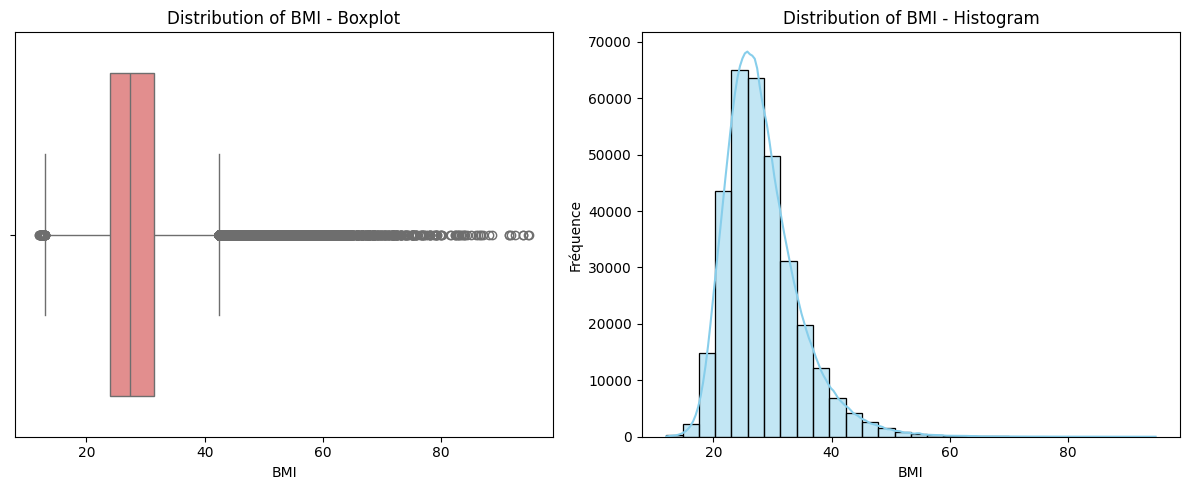

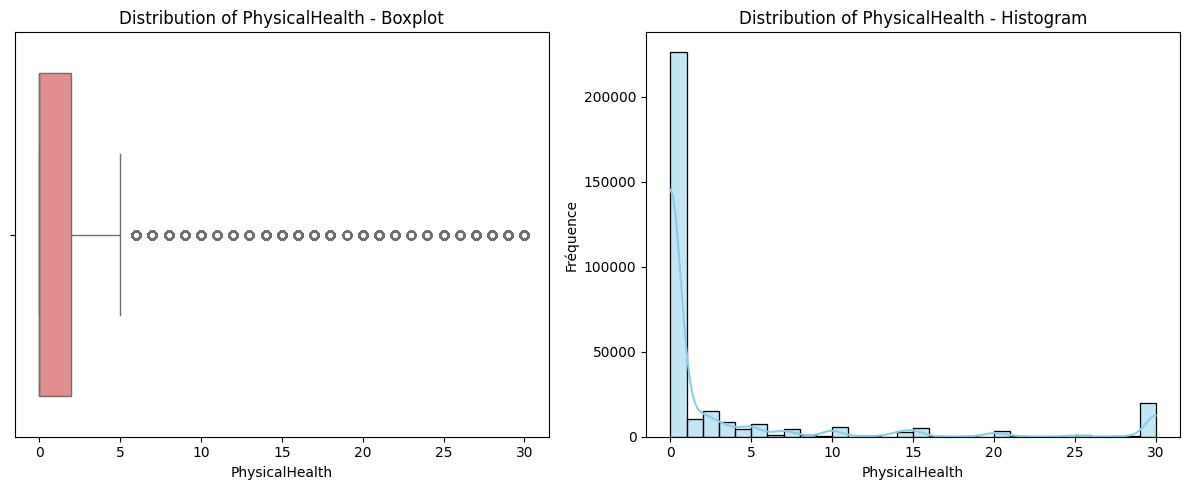

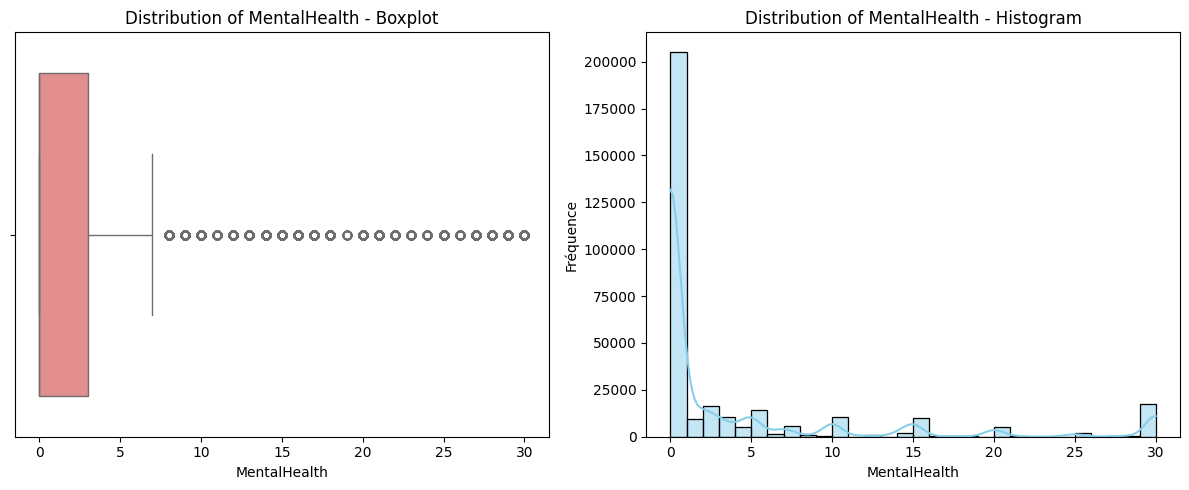

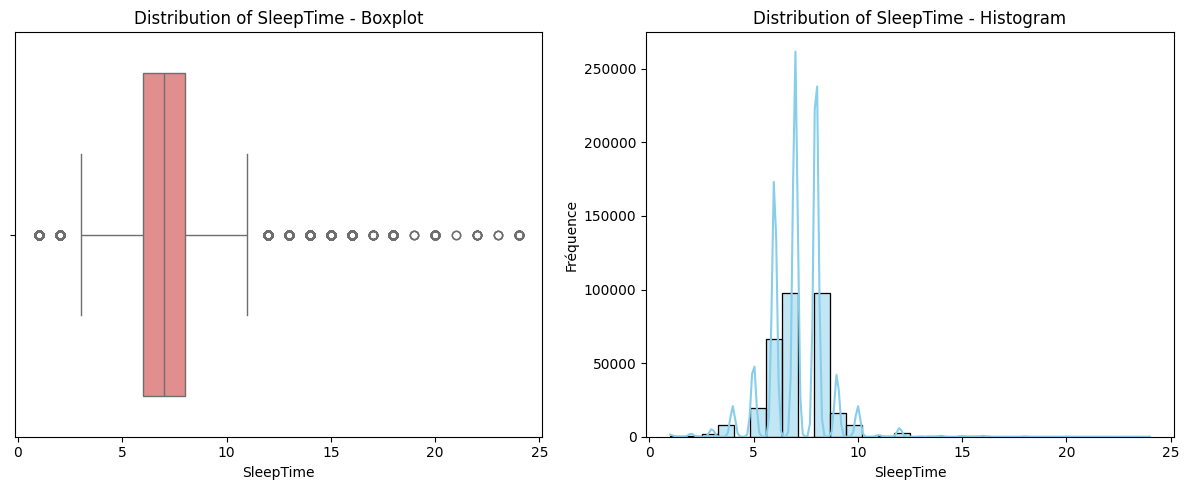

In [30]:
# Cellule de code
numeric_columns = df.select_dtypes(include=[float])

for column in numeric_columns.columns:
    # Plotting both boxplot and histogram for each numeric column
    plt.figure(figsize=(12, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=numeric_columns[column],color='lightcoral')
    plt.title(f'Distribution of {column} - Boxplot')
    plt.xlabel(column)

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(numeric_columns[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column} - Histogram')
    # plt.xlabel(column)
    plt.ylabel('Fréquence')

    plt.tight_layout()
    plt.show()



**BMI**

* Distribution légèrement asymétrique à droite (quelques personnes avec un BMI très élevé).
* Valeurs aberrantes : certains individus ont un BMI > 50 ou 60 → rare, mais pas impossible.
* Ces valeurs peuvent influencer négativement certains modèles sensibles aux extrêmes (ex: régression logistique, SVM).

**MentalHealth et  PhysicalHealth**

* Beaucoup de valeurs proches de 0 (la plupart des gens ont peu de jours de mauvaise santé).
* Quelques valeurs très hautes (vers 30) = outliers, mais logiques car c’est le maximum du mois.
* La distribution est fortement asymétrique à droite (skewed).

**SleepTime**
* En général, centrée autour de 6–8 heures, mais quelques valeurs extrêmes (<3 ou >12).
* Quelques outliers peuvent indiquer des saisies inhabituelles ou des comportements extrêmes.

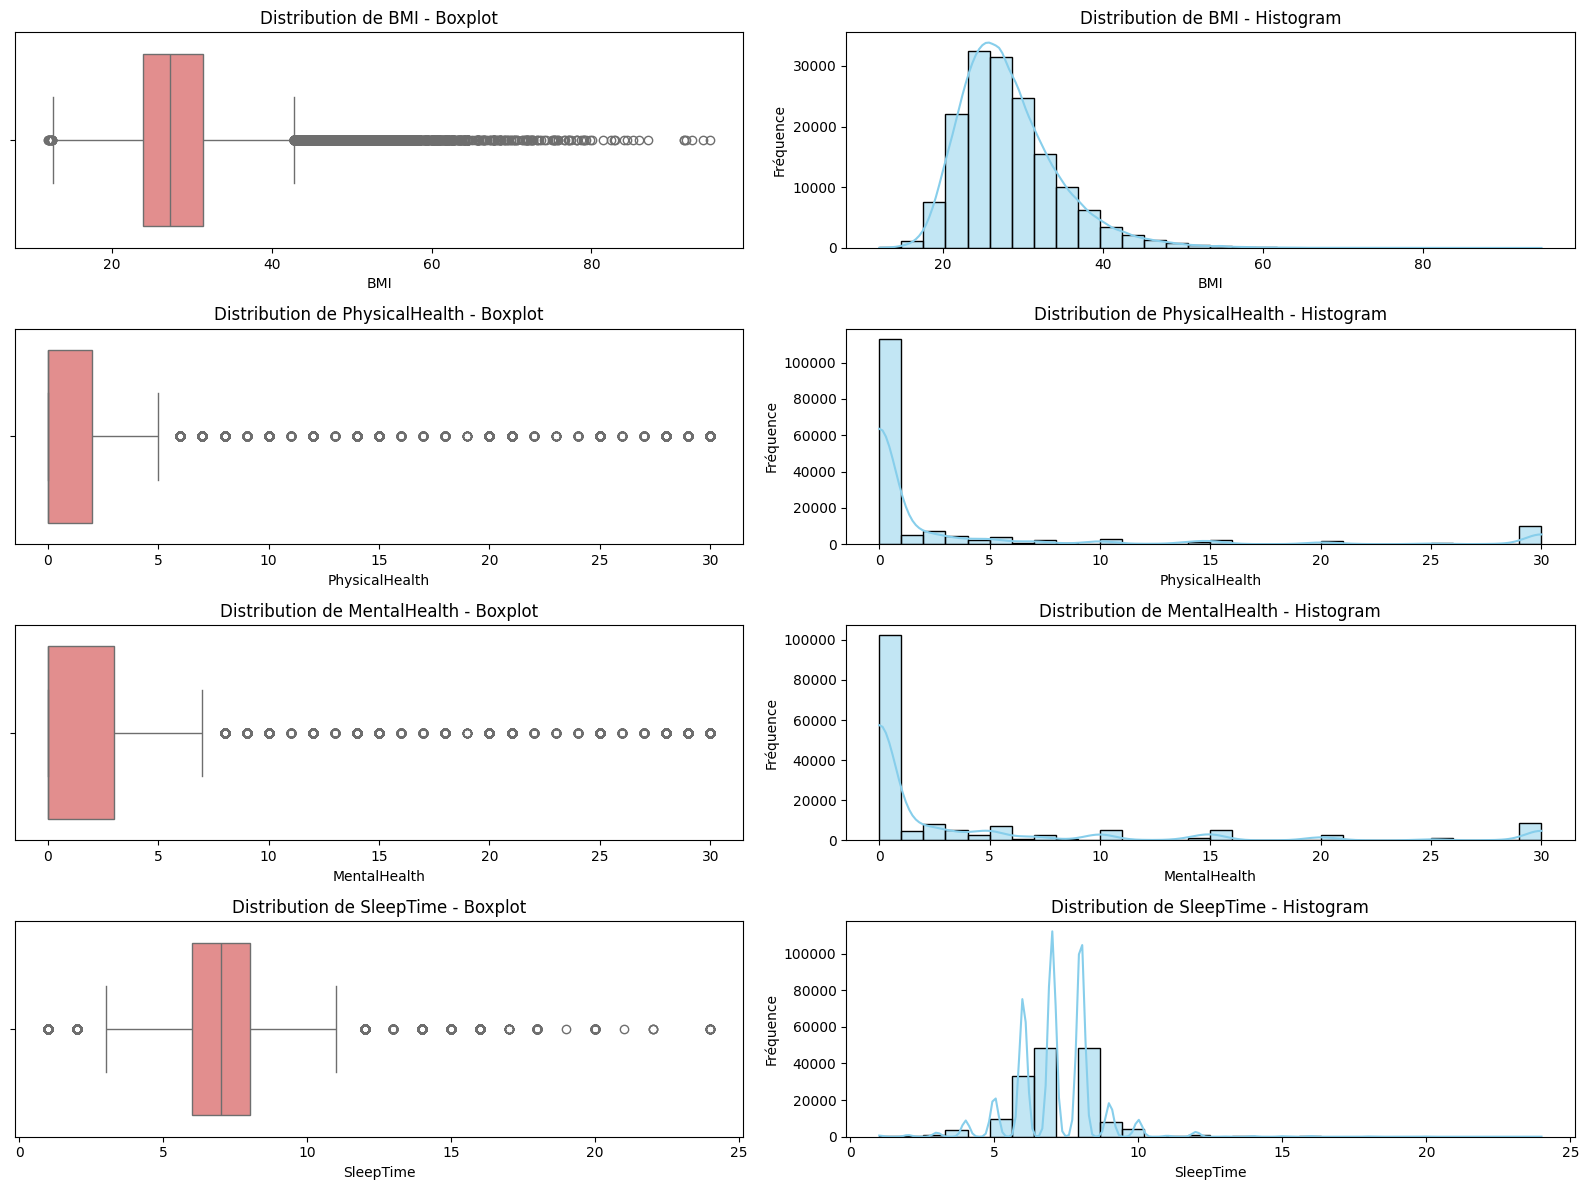

In [ ]:
# ----- solution2 , une seule figure (exterieur de la boucle) ---------
numeric_columns = df.select_dtypes(include=[float])

plt.figure(figsize=(16, 12))

# Boucle pour créer un boxplot et un histogramme pour chaque colonne numérique
for i, column in enumerate(numeric_columns.columns, 1):
    # Créer une grille avec 2 colonnes (boxplot à gauche, histogramme à droite)
    plt.subplot(len(numeric_columns.columns), 2, 2*i-1)  # 2 graphiques par ligne
    sns.boxplot(x=numeric_columns[column], color='lightcoral')  # Boxplot
    plt.title(f'Distribution de {column} - Boxplot')
    plt.xlabel(column)

    # Histogramme avec courbe KDE
    plt.subplot(len(numeric_columns.columns), 2, 2*i)  # 2 graphiques par ligne
    sns.histplot(numeric_columns[column], kde=True, bins=30, color='skyblue')  # Histogramme avec KDE
    plt.title(f'Distribution de {column} - Histogram')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()



3. **Distribution de la variable cible** :

    - Analysez la distribution de la variable cible pour identifier les déséquilibres de classes. Utilisez des diagrammes en barres pour visualiser les fréquences des classes.

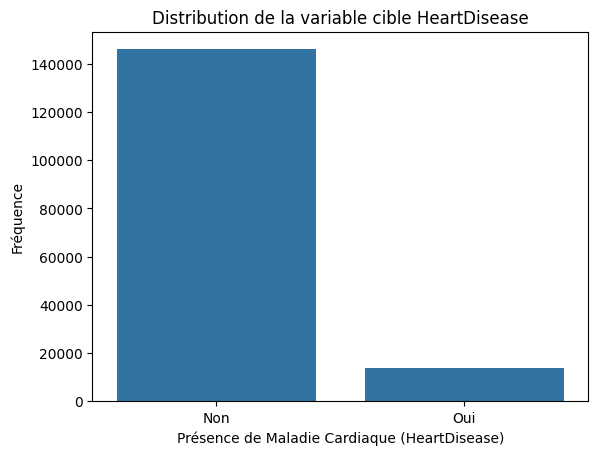

In [ ]:
# Affichage de la distribution de la variable cible 'HeartDisease'
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution de la variable cible HeartDisease')
plt.xlabel('Présence de Maladie Cardiaque (HeartDisease)')
plt.ylabel('Fréquence')
plt.xticks([0, 1], ['Non', 'Oui'], rotation=0)  # Modifier les labels de l'axe x
plt.show()

la majorité n’a pas de maladie cardiaque → c’est un jeu de données non équilibré (class imbalance).

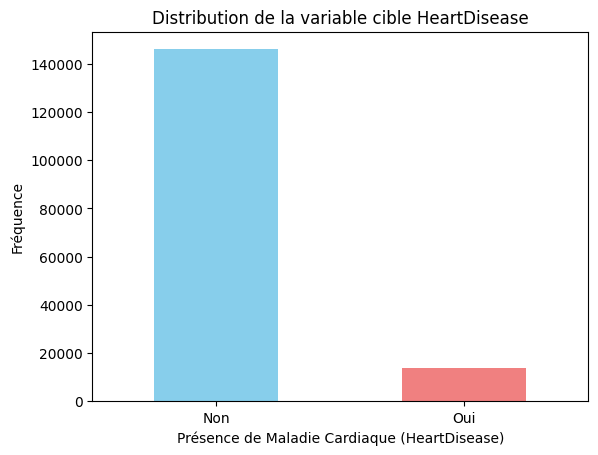

In [ ]:
# Affichage de la distribution de la variable cible 'HeartDisease' avec Pandas
df['HeartDisease'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution de la variable cible HeartDisease')
plt.xlabel('Présence de Maladie Cardiaque (HeartDisease)')
plt.ylabel('Fréquence')
plt.xticks([0, 1], ['Non', 'Oui'], rotation=0)
plt.show()

4. **Fractionnement des données** :

    - Divisez le jeu de données en ensembles d'entraînement (80 %) et de test (20 %) en utilisant la méthode du holdout.

    - Assurez-vous que ce fractionnement intervient avant tout prétraitement afin d'éviter les fuites de données.

In [4]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des dimensions après fractionnement
print(f"Dimensions de X_train : {X_train.shape}")
print(f"Dimensions de X_test : {X_test.shape}")
print(f"Dimensions de y_train : {y_train.shape}")
print(f"Dimensions de y_test : {y_test.shape}")


Dimensions de X_train : (255836, 17)
Dimensions de X_test : (63959, 17)
Dimensions de y_train : (255836,)
Dimensions de y_test : (63959,)


## Prétraitement des données

5. **Encodage des variables catégoriques** :

    - Encodez les variables catégoriques. Justifiez la méthode choisie.

***Encodage des variables catégorielles (`X_train` et `X_test`)***

Nous utilisons **OneHotEncoder** pour transformer les colonnes catégorielles en colonnes binaires (0/1).  
- Chaque catégorie devient une colonne indépendante.  
- Cela évite de créer un ordre artificiel entre les catégories, contrairement à LabelEncoder.    
- Compatible avec la plupart des modèles classiques (régression logistique).

In [5]:
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

# Encoder les variables catégorielles dans X_train
encoded_train = encoder.fit_transform(X_train[categorical_columns])
encoded_train_df = pd.DataFrame(encoded_train,
                                columns=encoder.get_feature_names_out(categorical_columns))
# Reset index before concatenation
X_train_encoded = pd.concat(
    [X_train.reset_index(drop=True), encoded_train_df.reset_index(drop=True)], axis=1
).drop(categorical_columns, axis=1)

# Encoder les variables catégorielles dans X_test
encoded_test = encoder.transform(X_test[categorical_columns])
encoded_test_df = pd.DataFrame(encoded_test,
                               columns=encoder.get_feature_names_out(categorical_columns))
X_test_encoded = pd.concat(
    [X_test.reset_index(drop=True), encoded_test_df.reset_index(drop=True)], axis=1
).drop(categorical_columns, axis=1)

In [6]:
print(f"Dimensions de X_train avant encodage : {X_train.shape}")
print(f"Dimensions de X_train après encodage : {X_train_encoded.shape}")
print(f"Dimensions de X_test avant encodage : {X_test.shape}")
print(f"Dimensions de X_test après encodage : {X_test_encoded.shape}")


Dimensions de X_train avant encodage : (255836, 17)
Dimensions de X_train après encodage : (255836, 50)
Dimensions de X_test avant encodage : (63959, 17)
Dimensions de X_test après encodage : (63959, 50)


***Encodage de la variable cible (`y_train` et `y_test`)***

Nous utilisons **LabelEncoder** pour transformer la variable cible `HeartDisease` en valeurs numériques (0 = Non, 1 = Oui).  
- Les modèles de machine learning nécessitent que la sortie soit numérique pour la classification.  
- `fit_transform` est appliqué sur l’ensemble d’entraînement et `transform` sur le test pour éviter toute fuite de données.



In [7]:
# Encoder la variable cible y_train et y_test
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

6. **Normalisation/Standardisation des attributs numériques** :

    - Normalisez ou standardisez les attributs numériques si nécessaire. Décrivez la technique utilisée (par exemple, le scaling Min-Max, StandardScaler) et expliquez pourquoi elle est appropriée pour ce jeu de données.

    - Assurez-vous que cette technique est appliquée uniquement aux données d'entraînement, avec la même transformation appliquée ensuite aux données de test sans nouvel ajustement.

Outliers = > StandardScaler garantit que les données ont une échelle uniforme (moyenne = 0, écart-type = 1), ce qui aide à améliorer la convergence des algorithmes de ML comme la régression logistique.

In [8]:
# standardisation des données numériques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Vérification des dimensions
print(f"Dimensions de X_train_scaled : {X_train_scaled.shape}")
print(f"Dimensions de X_test_scaled : {X_test_scaled.shape}")

Dimensions de X_train_scaled : (255836, 50)
Dimensions de X_test_scaled : (63959, 50)


## Développement et évaluation des modèles

7. **Développement des modèles** :

    - Implémentez les modèles d'apprentissage automatique abordés en classe : arbres de décision, K-Nearest Neighbors (KNN) et régression logistique. Utilisez les paramètres par défaut de scikit-learn comme base pour entraîner chaque modèle.

In [36]:
# Vérification finale des dimensions
print(f"Dimensions de X_train_encoded : {X_train_encoded.shape}")
print(f"Dimensions de X_test_encoded : {X_test_encoded.shape}")

# Assure-toi que X_train et y_train ont le même nombre d'exemples
print(f"Dimensions de y_train : {y_train.shape}")



Dimensions de X_train_encoded : (255836, 50)
Dimensions de X_test_encoded : (63959, 50)
Dimensions de y_train : (255836,)


In [37]:
# Implémentation des modèles d'apprentissage automatique

# 1. Arbre de décision
dt_model = DecisionTreeClassifier(random_state=42)

# 2. K-Nearest Neighbors
knn_model = KNeighborsClassifier()

# 3. Régression logistique
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

8. **Évaluation des modèles** :

    - Utilisez la validation croisée pour évaluer chaque modèle, en justifiant votre choix du nombre de plis.

    - Évaluez les modèles à l'aide de métriques telles que la précision, le rappel et le score F1.

In [9]:
# Définition de la fonction d'évaluation des modèles
def evaluate_model(model, X, y, cv=5):
    scoring = {'accuracy': 'accuracy', 'precision': make_scorer(precision_score),
               'recall': make_scorer(recall_score), 'f1': make_scorer(f1_score)}

    # Effectuer la validation croisée avec les scores définis
    results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)

    # Affichage des résultats
    print(f"Résultats pour {model.__class__.__name__} (Validation croisée à {cv} plis):")
    print(f"Précision : {np.mean(results['test_accuracy']):.4f} ± {np.std(results['test_accuracy']):.4f}")
    print(f"Rappel : {np.mean(results['test_recall']):.4f} ± {np.std(results['test_recall']):.4f}")
    print(f"Score F1 : {np.mean(results['test_f1']):.4f} ± {np.std(results['test_f1']):.4f}")
    print("-" * 50)


cv = 5 est un bon choix par défaut, surtout pour des jeux de données modérés en taille.

In [39]:
# Utilisation de la validation croisée pour évaluer chaque modèle
cv = 5  # Choix de 5 plis pour la validation croisée

print("Évaluation du modèle : Arbre de Décision")
evaluate_model(dt_model, X_train_scaled, y_train_encoded, cv)

print("Évaluation du modèle : K-Nearest Neighbors")
evaluate_model(knn_model, X_train_scaled, y_train_encoded, cv)

print("Évaluation du modèle : Régression Logistique")
evaluate_model(logreg_model, X_train_scaled, y_train_encoded, cv)

Évaluation du modèle : Arbre de Décision
Résultats pour DecisionTreeClassifier (Validation croisée à 5 plis):
Précision : 0.8655 ± 0.0005
Rappel : 0.2550 ± 0.0031
Score F1 : 0.2441 ± 0.0019
--------------------------------------------------
Évaluation du modèle : K-Nearest Neighbors
Résultats pour KNeighborsClassifier (Validation croisée à 5 plis):
Précision : 0.9063 ± 0.0006
Rappel : 0.1466 ± 0.0038
Score F1 : 0.2103 ± 0.0044
--------------------------------------------------
Évaluation du modèle : Régression Logistique
Résultats pour LogisticRegression (Validation croisée à 5 plis):
Précision : 0.9164 ± 0.0002
Rappel : 0.1083 ± 0.0013
Score F1 : 0.1807 ± 0.0018
--------------------------------------------------


 * La **précision** élevée pour tous les modèles indique que la plupart des prédictions sont correctes pour la classe majoritaire.
* Le **rappel** très faible pour tous les modèles indique qu'ils ont du mal à identifier les instances de la classe minoritaire.
* Le **score F1** est une mesure qui combine précision et rappel. Le faible score F1 pour tous les modèles indique un compromis médiocre entre la précision et le rappel. Cela confirme que la classe minoritaire n'est pas bien capturée par les modèles.
* Les résultats montrent un déséquilibre  entre les classes, ce qui impacte la capacité des modèles à prédire correctement la classe minoritaire.

=> Les résultats montrent que les modèles, bien qu'ayant de bonnes précisions, ont des rappels faibles en raison du déséquilibre des classes. L'optimisation du modèle en fonction de la performance sur la classe minoritaire (les malades) semble être la prochaine étape importante à explorer.

# 2. Documentation de l'analyse exploratoire

Le rapport doit documenter de manière complète le processus suivi pendant ce devoir. Le notebook Jupyter doit inclure les éléments suivants :


- Une section pour chaque étape de l'analyse exploratoire, contenant le code Python pertinent et les explications ou résultats.
  - Pour les sections nécessitant du code Python, incluez le code dans une cellule.
  - Pour les sections nécessitant des explications ou des résultats, incluez-les dans une cellule distincte ou en combinaison avec les cellules de code.
- Assurez une séparation logique du code dans différentes cellules. Par exemple, la définition d'une fonction doit se trouver dans une cellule et son exécution dans une autre. Évitez de placer trop de code dans une seule cellule pour maintenir la clarté et la lisibilité.
- Le notebook que vous soumettez doit inclure les résultats de l'exécution, y compris les graphiques, en veillant à ce que l'assistant d'enseignement puisse évaluer le notebook sans avoir à exécuter le code.




**Sur-échantillonnage de la classe minoritaire**

Principe : On augmente artificiellement le nombre d’exemples de la classe minoritaire (HeartDisease = 1) pour équilibrer le dataset.
Technique la plus utilisée : SMOTE (Synthetic Minority Oversampling Technique)

In [10]:
from imblearn.over_sampling import SMOTE

# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train_encoded)

# Vérification de la distribution
print(pd.Series(y_train_balanced).value_counts())


0    234055
1    234055
Name: count, dtype: int64


**Pondération des classes**

Principe : On demande au modèle de penaliser plus fortement les erreurs sur la classe minoritaire.

In [41]:
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
logreg_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

In [42]:
cv = 5

print("Évaluation du modèle : Arbre de Décision")
evaluate_model(dt_model, X_train_balanced, y_train_balanced, cv)


Évaluation du modèle : Arbre de Décision
Résultats pour DecisionTreeClassifier (Validation croisée à 5 plis):
Précision : 0.8907 ± 0.0463
Rappel : 0.8881 ± 0.1157
Score F1 : 0.8862 ± 0.0606
--------------------------------------------------


In [43]:
cv = 5
print("Évaluation du modèle : Régression Logistique")
evaluate_model(logreg_model, X_train_balanced, y_train_balanced, cv)

Évaluation du modèle : Régression Logistique
Résultats pour LogisticRegression (Validation croisée à 5 plis):
Précision : 0.7681 ± 0.0016
Rappel : 0.7894 ± 0.0030
Score F1 : 0.7729 ± 0.0018
--------------------------------------------------


In [ ]:
# knn_model = KNeighborsClassifier(n_neighbors=3, algorithm='auto')
knn_model = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')  # BallTree pour accélerer les calculs

cv = 3
print("Évaluation du modèle : K-Nearest Neighbors")
evaluate_model(knn_model, X_train_balanced, y_train_balanced, cv)
##===> lent

Évaluation du modèle : K-Nearest Neighbors
